Task 1: Write a function that fnds, given a fnite set of points in the plane and an integer
k, the k nearest neighbors of each point in the set using numpy’s vectorized facilities.

In [17]:
import numpy as np

def k_nearest_neighbors(points, k):

    pairwise_distances = np.sqrt(np.sum((points[:, np.newaxis] - points) ** 2, axis=2)) # Calculate the pairwise Euclidean distances between all points.

    np.fill_diagonal(pairwise_distances, np.inf) # Calculate the pairwise Euclidean distances between all points.

    neighbors_indices = np.argsort(pairwise_distances, axis=1)[:, :k] # Find the indices of the k nearest neighbors for each point.

    return neighbors_indices

    neighbors_indices = k_nearest_neighbors(points, k)
    print("Indices of the k nearest neighbors:")
    print(neighbors_indices)


In [20]:
import math

def euclidean_distance(point1, point2): # Function to calculate Euclidean distance between two points
    return math.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

def k_nearest_neighbors(points, k): # Function to find k nearest neighbors for each point
    neighbors = {}
    for i, point1 in enumerate(points):
        distances = [(j, euclidean_distance(point1, point2)) for j, point2 in enumerate(points) if i != j]
        distances.sort(key=lambda x: x[1])  # Sort by distance
        k_neighbors = [j for j, _ in distances[:k]]
        neighbors[i] = k_neighbors
    return neighbors



In [18]:
if __name__ == "__main__":
    # Generate some random points for demonstration.
    np.random.seed(0)
    points = np.random.rand(5, 3)  # 5 random points in the plane
    k = 3  # Find the 3 nearest neighbors for each point

    neighbors_indices = k_nearest_neighbors(points, k)
    print("Indices of the k nearest neighbors:")
    print(neighbors_indices)


Indices of the k nearest neighbors:
[[3 1 2]
 [0 3 2]
 [0 3 1]
 [0 1 2]
 [3 0 1]]


Task 2: Apply your function to this set of points with k = 3. Plot an arrow from each point
to its k-nearest neighbors.

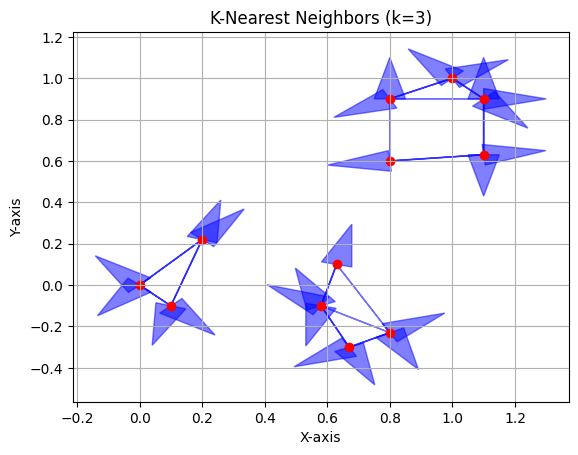

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Sample data: Replace this with your actual set of points
points = np.array( [[0, 0], [0.2, 0.22], [0.1, -0.1], [1, 1], [1.1, 0.9], [0.8, 0.9], [1.1, 0.63],
     [0.58, -0.1], [0.63, 0.1], [0.67, -0.3], [0.8, -0.23], [0.8, 0.6]]
)

# Define the number of nearest neighbors (k)
k = 3

# Create a NearestNeighbors model
nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(points)

# Find the k-nearest neighbors for each point
distances, indices = nbrs.kneighbors(points)

# Plot the points and arrows to their k-nearest neighbors

for i, point in enumerate(points):
    for neighbor_idx in indices[i][1:]:
        neighbor = points[neighbor_idx]
        plt.arrow(point[0], point[1], neighbor[0] - point[0], neighbor[1] - point[1], head_width=0.1, head_length=0.2, fc='blue', ec='blue', alpha=0.5)

# Scatter plot of points
plt.scatter(points[:, 0], points[:, 1], c='red', marker='o', label='Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.grid(True)
plt.title(f'K-Nearest Neighbors (k={k})')
plt.show()
